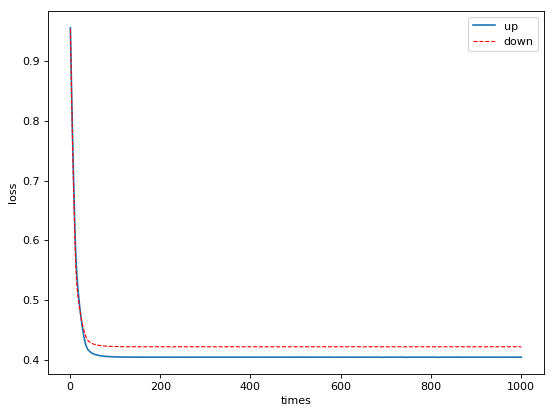

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
dir = "./jiqixuexi/"
# read file
def get_data():
    data = load_svmlight_file(dir + "australian_scale.txt")
    return data[0], data[1]

# gradient
def gradient(w,x,y):
    grad = np.zeros((15,))
    for i in range(x.shape[0]):
        if (1-y[i]*np.dot(w.T,x[i].T))>0 :
            grad += w - y[i]*(x[i].T)
        if (1-y[i]*np.dot(w.T,x[i].T))<=0 :
            grad += w
    shample =  x.shape[0]
    grad = (1/shample)*grad
    return grad

# get_loss
def get_loss(w,x,y):
    los = 0
    for i in range(x.shape[0]):
        if (1-y[i]*np.dot(w.T,x[i].T))>0 :
            los += 1-y[i]*np.dot((w.T),(x[i].T))
        if (1-y[i]*np.dot(w.T,x[i].T))<=0 :
            los += 0
    return (0.5*np.dot((w.T),w)+los)/x.shape[0]

X,y = get_data()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)
a = np.ones((X_train.shape[0],1))
b = np.ones((X_test.shape[0],1))
X_train = np.column_stack((X_train.toarray(),a))
X_test = np.column_stack((X_test.toarray(),b))
loss =[]
loss_test= []
grad= np.zeros((15,))
w = np.zeros((15,))
time = 1000 
while time>0:
    grad = gradient(w,X_train,y_train)
    w = w - 0.05*grad
    loss.append(get_loss(w,X_train,y_train))
    loss_test.append(get_loss(w,X_test,y_test))
    time = time-1;
    

x = []
for i in range(1000):
    x.append(i+1)
plt.figure(figsize=(8,6), dpi=80)
l1,= plt.plot(x, loss)
l2,=plt.plot(x, loss_test, color='red', linewidth=1.0, linestyle='--')
plt.xlabel('times')
plt.ylabel('loss')
plt.legend(handles=[l1, l2], labels=['up', 'down'],  loc='best')
plt.show()            
            